<a href="https://colab.research.google.com/github/Ritwik7999/Ritwik/blob/master/Trees_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import plot_tree

RANDOM_SEED = 1

# Step 1: Load the dataset and explore it

https://www.kaggle.com/datasets/uciml/autompg-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
project_dir = '/content/drive/MyDrive/Colab Notebooks/'
file_name = 'auto-mpg.csv'
data = pd.read_csv(project_dir + file_name)
data

Mounted at /content/drive


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- Notice horsepower is of type object; let's investigate this further

In [ ]:
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [ ]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
data.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,94
weight,351
acceleration,95
model year,13
origin,3
car name,305


In [ ]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# The reason horsepower is loaded as type object is that we have non numeric values in the column
data['horsepower'].str.count('\?').sum()

6

In [ ]:
data[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
# Replace '?' with NaN in the entire DataFrame
data.replace('?', np.nan, inplace=True)

In [ ]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
# too many car names, almost the same number of rows in a dataset,
# drop the column as it is unlikely to have any predictive value
del data['car name']

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [ ]:
# check for duplicate rows
data.duplicated().sum()

0

In [ ]:
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,93,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000


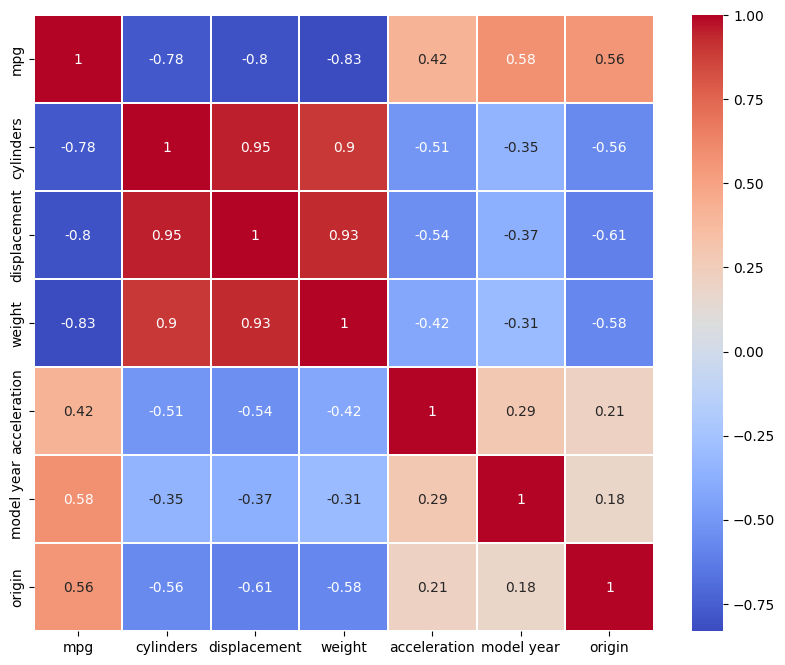

In [ ]:
# visualize correlation with a heatmap

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.004)
plt.show()

We can see there is a correlation.  But we don't know if the correlation is linear

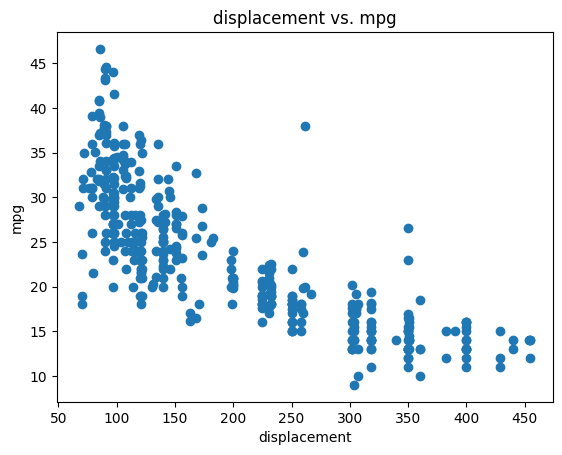

In [ ]:
# displacement vs. mpg visualization

# Create scatter plot
plt.scatter(data['displacement'], data['mpg'])

# Set labels and title
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.title('displacement vs. mpg')

# Display the plot
plt.show()

Notice the non-linear relationship between the feature and the target.  Some models may not be able to capture non-linear relationships

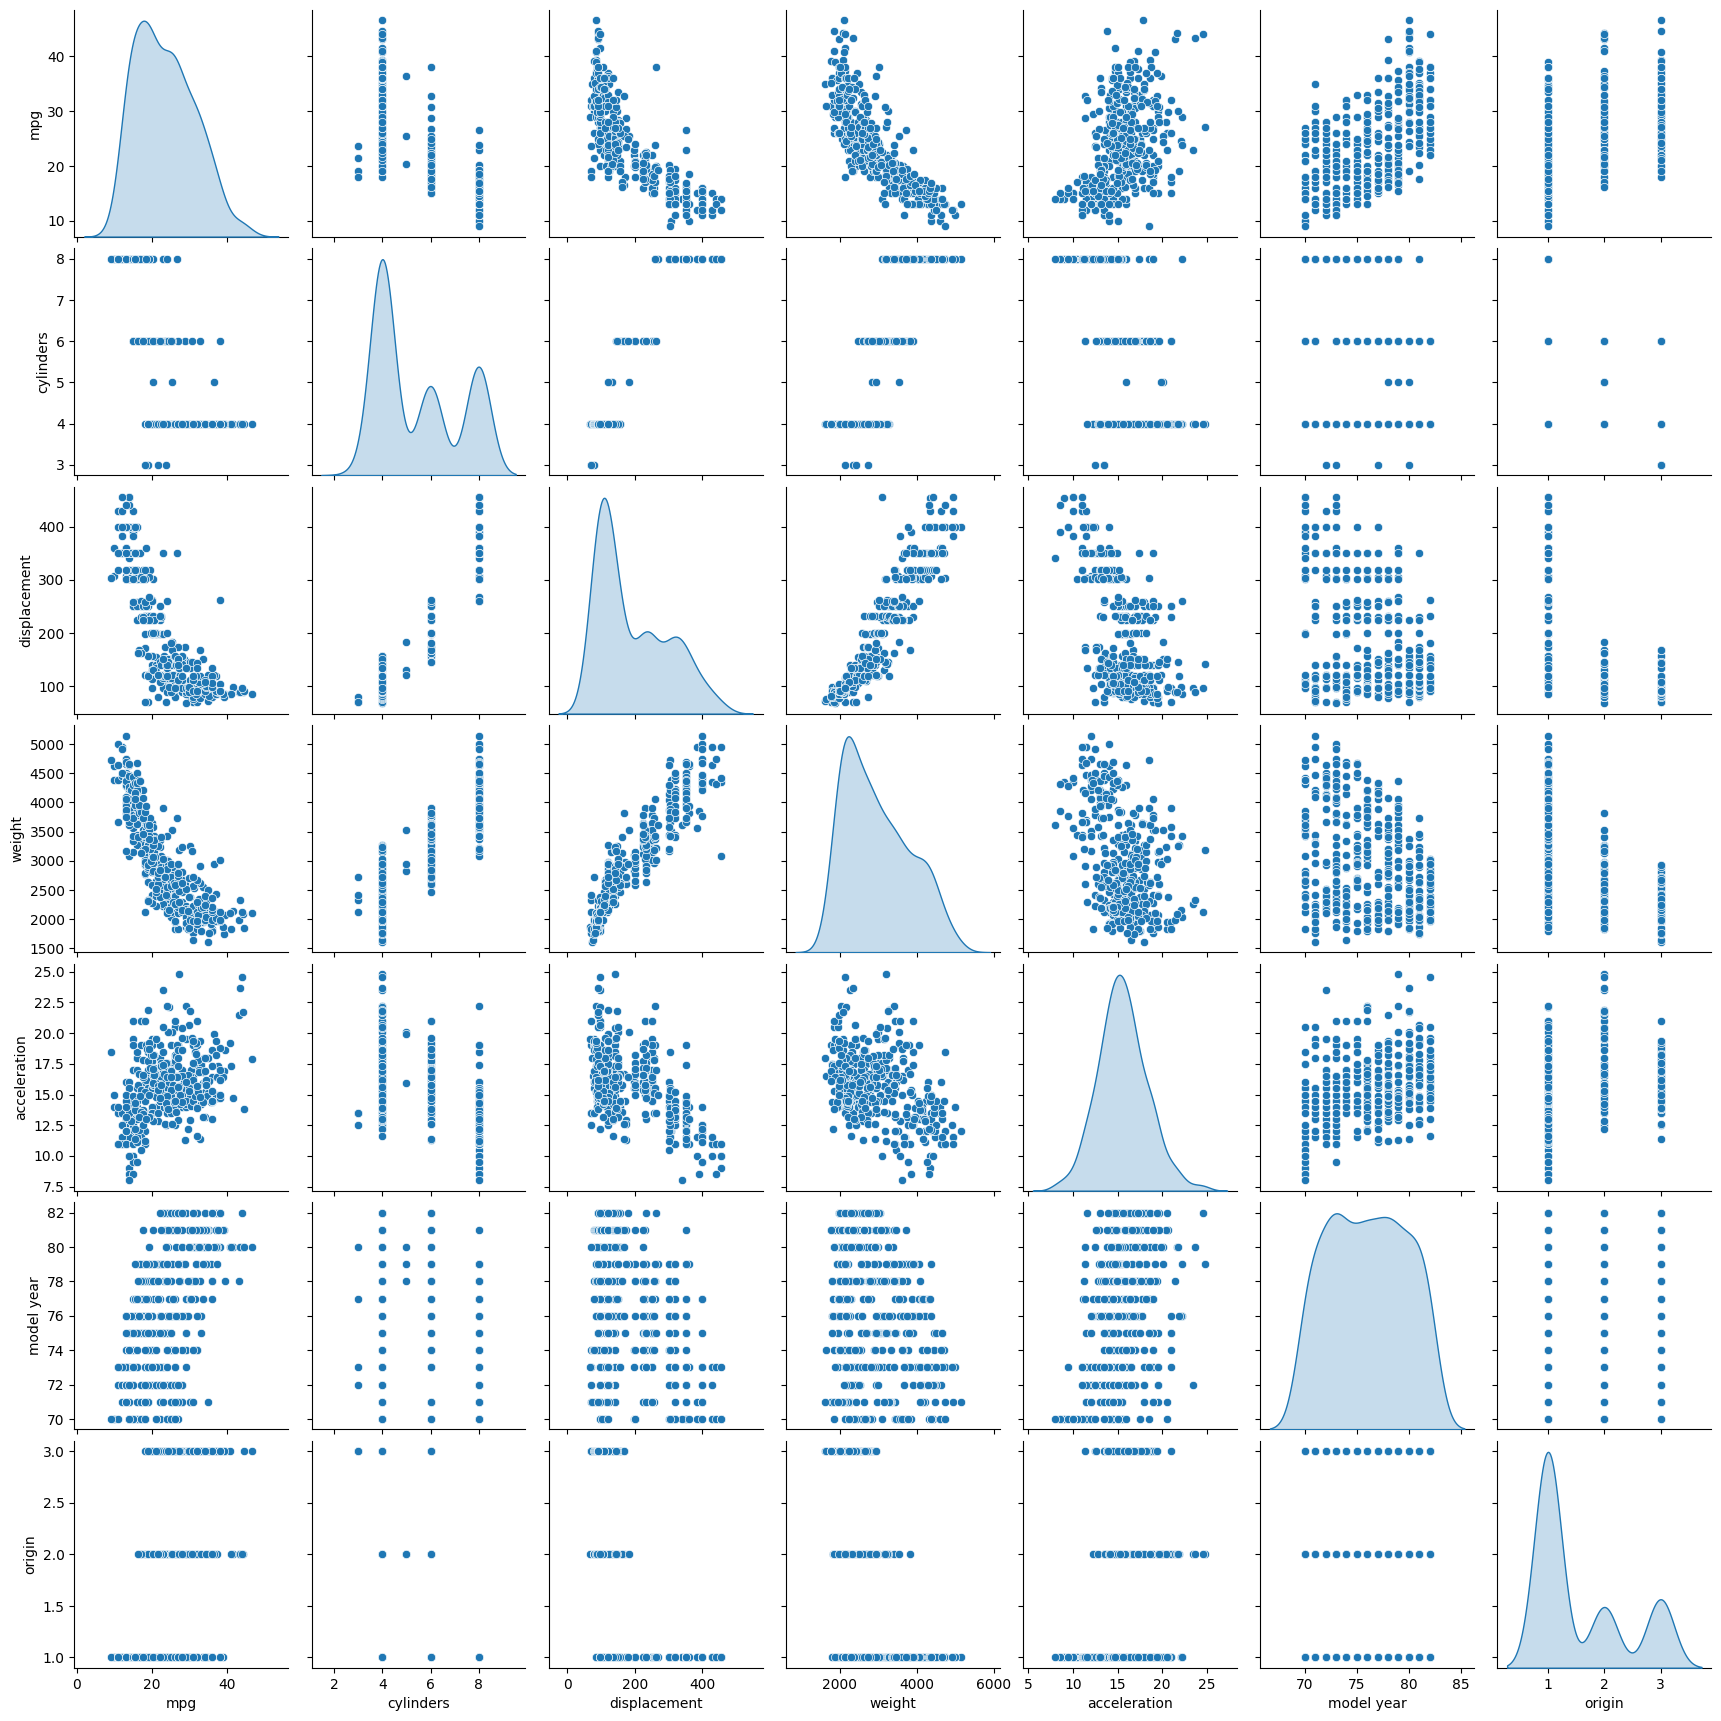

In [ ]:
sns.pairplot(data,diag_kind = 'kde')

# Step 3: Split the dataset into training and test sets

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
X = data.drop('mpg', axis=1)  # Features
y = data['mpg']  # Target variable

In [ ]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [ ]:
X[0:5]

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [ ]:
X.head(5)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [ ]:
X[393:397]

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [ ]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.shape

(398, 7)

Compare the median value for train, test and the entire dataset

## Feature Imputation

In [ ]:
X_train.head(1)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
157,8,350.0,145,4440,14.0,75,1


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 157 to 102
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     278 non-null    int64  
 1   displacement  278 non-null    float64
 2   horsepower    273 non-null    object 
 3   weight        278 non-null    int64  
 4   acceleration  278 non-null    float64
 5   model year    278 non-null    int64  
 6   origin        278 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 17.4+ KB


In [ ]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
X_train = imputer.transform(X_train)


imputer.fit(X_test)
X_test = imputer.transform(X_test)

In [ ]:
# the data is returned as a numpy array!
print (type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X.shape

(398, 7)

In [ ]:
# Step 4: Build the regression tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Step 5: Evaluate the model

y_pred = dt.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

print('Train Mean Absolute Error:', mae)
print('Train Mean Squared Error:', mse)

print('*******')
print('*******')

y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Test Mean Absolute Error:', mae)
print('Test Mean Squared Error:', mse)


Train Mean Absolute Error: 0.0
Train Mean Squared Error: 0.0
*******
*******
Test Mean Absolute Error: 2.3625
Test Mean Squared Error: 12.669416666666669


Test error is greater than training error, this model is overfitting to training

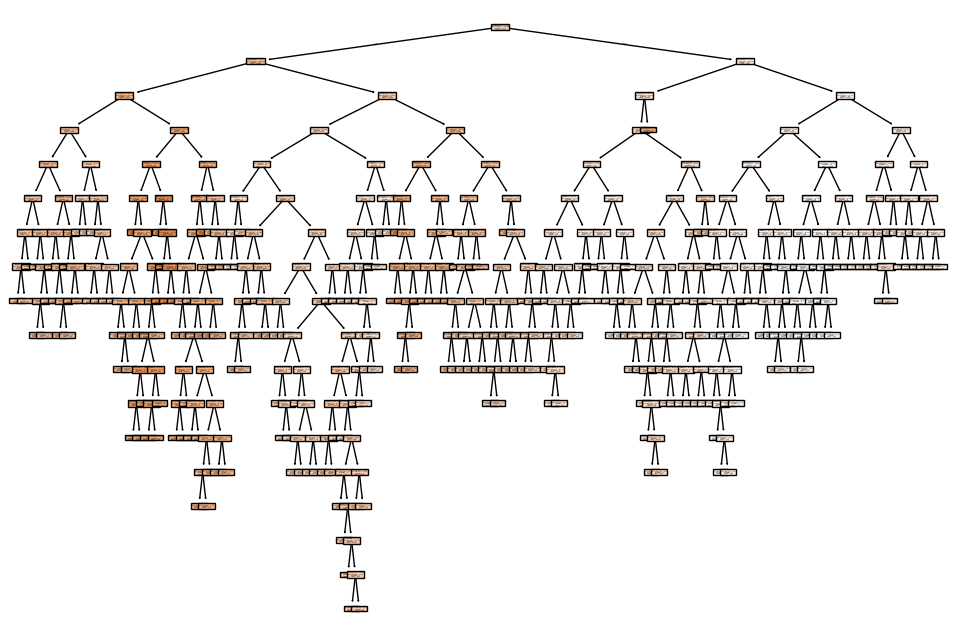

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
print(dt.tree_.max_depth)

17


In [ ]:
param_grid_rf = { 'max_depth': [5, 8, 15, 25, 30],
                  'min_samples_leaf': [4, 5, 10],
                  'max_leaf_nodes': [8, 16]
                 }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid_rf = RandomizedSearchCV(dt,
                             param_grid_rf,
                             cv=5, scoring='neg_mean_squared_error',
                             verbose = 2)

In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, max_leaf_nodes=16, min_samples_leaf=10; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=16, min_samples_leaf=10; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=16, min_samples_leaf=10; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=16, min_samples_leaf=10; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=16, min_samples_leaf=10; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=16, min_samples_leaf=5; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=16, min_samples_leaf=5; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=16, min_samples_leaf=5; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=16, min_samples_leaf=5; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=16, min_samples_leaf=5; total time=   0.0s
[CV] END ..max_depth=5, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV] END ..max_depth=5, max_leaf_nodes=8, min_sa

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'max_leaf_nodes': [8, 16],
                                        'min_samples_leaf': [4, 5, 10]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_dt = grid_rf.best_estimator_
best_score = grid_rf.best_score_

In [ ]:
best_dt

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=16, min_samples_leaf=10,
                      random_state=42)

In [ ]:
best_score

-12.831647374519346

In [ ]:
y_pred = best_dt.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

print('Train Mean Absolute Error:', mae)
print('Train Mean Squared Error:', mse)

y_pred = best_dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Test Mean Absolute Error:', mae)
print('Test Mean Squared Error:', mse)

Train Mean Absolute Error: 1.8936612360871719
Train Mean Squared Error: 7.159406284122415
Test Mean Absolute Error: 2.3166808096324227
Test Mean Squared Error: 9.219909234250947


- We may have a case of overfitting due to the depth of the tree

In [ ]:
print(best_dt.tree_.max_depth)

5


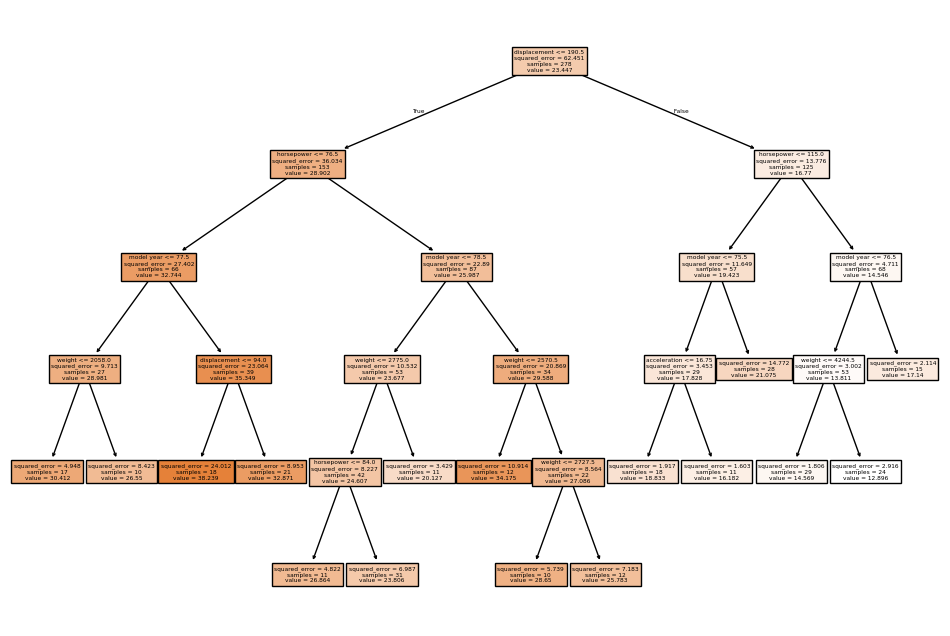

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
# Step 4: Build the regression tree model
dt2 = DecisionTreeRegressor(max_depth=4,
                           #each leaf must contain at least 10% of the training data
                           min_samples_leaf= 0.1,
                           random_state=3)
dt2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [ ]:
# Step 5: Evaluate the model
y_pred = dt2.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

print('Train Mean Absolute Error:', mae)
print('Train Mean Squared Error:', mse)

print('*******')
print('*******')

y_pred = dt2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Train Mean Absolute Error:', mae)
print('Test Mean Squared Error:', mse)

Train Mean Absolute Error: 2.5033451703845837
Train Mean Squared Error: 11.55958777862807
*******
*******
Train Mean Absolute Error: 2.890052336020758
Test Mean Squared Error: 13.203811862700825


In [ ]:
dt2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 3,
 'splitter': 'best'}

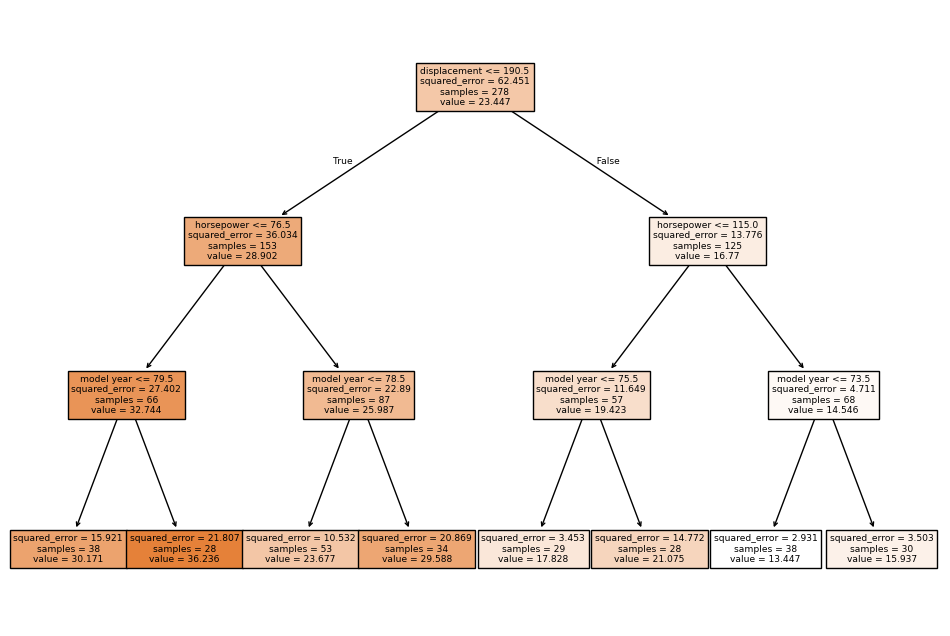

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt2, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
print(dt2.tree_.max_depth)

3


In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [ ]:
dt3 = DecisionTreeRegressor(max_depth=4,
                           #each leaf must contain at least 10% of the training data
                           min_samples_leaf= 0.14,
                           random_state=3)

MSE_CV = cross_val_score(dt3, X_train, y_train, cv=10,
                         scoring = 'neg_mean_squared_error',
                         n_jobs =-1)
# https://scikit-learn.org/stable/modules/model_evaluation.html

dt3.fit(X_train,y_train)
#y_pred_train = dt3.predict(X_train)
#y_pred_test = dt3.predict(X_test)

#y_pred = dt3.predict(X_test)

#mae = mean_absolute_error(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)

#print('Test Mean Absolute Error:', mae)
#print('Test Mean Squared Error:', mse)


DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=3)

In [ ]:
y_pred = dt3.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

print('Train Mean Absolute Error:', mae)
print('Train Mean Squared Error:', mse)

print('*******')
print('*******')

y_pred = dt3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Test Mean Absolute Error:', mae)
print('Test Mean Squared Error:', mse)

Train Mean Absolute Error: 2.8807670915256054
Train Mean Squared Error: 15.403858969717795
*******
*******
Test Mean Absolute Error: 3.1298917748917745
Test Mean Squared Error: 17.440929476170208


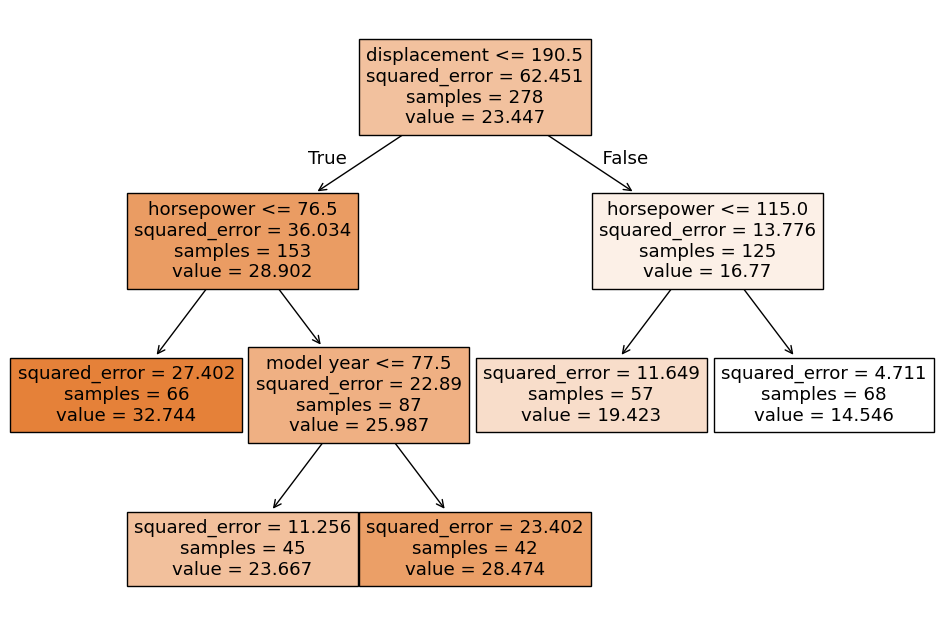

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt3, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
print(dt3.tree_.max_depth)

3


In [ ]:
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1


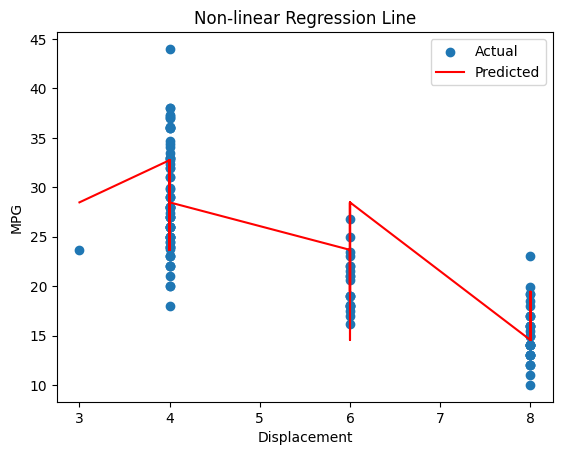

In [ ]:
y_pred = dt3.predict(X_test)  # Predictions on your test data

# Sort data points for smoother line plotting
sorted_indices = np.argsort(X_test[:, 0])  # Assuming 'displacement' is the first feature
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label='Actual')  # Scatter plot of actual values
plt.plot(X_test_sorted[:, 0], y_pred_sorted, color='red', label='Predicted')  # Line plot of predictions
plt.xlabel('Displacement')  # Set x-axis label
plt.ylabel('MPG')  # Set y-axis label
plt.title('Non-linear Regression Line')  # Set title
plt.legend()  # Show legend
plt.show()  # Display the plot